# Lista 6 - Análise Numérica 

## Exercício 2

Uma área importante onde equações parabólicas são usadas é no estudo da evolução espaço-temporal de
populações biológicas. Populações tendem a comportar-se como o calor, no sentido de que elas se espalham
ou propagam desde áreas com altas densidades até áreas com densidades mais baixas. Além de, obvialmente,
crescer e morrer. Para modelar a densidade $u(x, t)$ da população no tempo $t ~ (0 \le t \le T)$ e na posição $x ~ (0 \le x  \le L)$, considere o seguinte modelo dado por uma EDP de reação-difusão:

$$
u_t = cu_{xx} + du, c,d \in \mathbb{R} \\
u(x,0) = \sin^2\left(\frac{\pi}{2}x\right), 0 \le x \le L \\
u(0, t) = 0, t > 0 \\
u(L, t) = 0, t > 0
$$

O termo difusivo $cu_{xx}$ causa que a população se espalhe ao longo da direção $x$. O termo $du$ (reação) contribui com o crescimento da população na razão $d$. As condições de fronteira representam o fato de que a população vive no espaço $0 \le x \le L$. Se a população sobrevive ou segue em direção à extinção vai depender dos valores de $c$; $d$ e $L$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a) Utilize o método BTCS para elaborar um programa computacional que tenha como entrada: $c$; $d$; $L$; $T$;
$\Delta t$; $\Delta x$ e que a saída seja o gráfico da solução $u(x, t)$ para $(x, t) \in [0, L] \times [0, T]$:

Denote $w_{ij} \approx u(x_i, t_j)$, em que $x_i = i \cdot \Delta x$ e $t_j = j \cdot \Delta t$ e $\alpha = c\Delta t/ \Delta x^2$. O algoritmo deve fazer: 

$$\frac{w_{ij} - w_{i,j-1}}{\Delta t} = c\frac{w_{i+1,j} - 2w_{ij} + w_{i-1,j}}{\Delta x^2} + dw_{ij} \implies w_{i,j-1} = (1 - \Delta t d)w_{ij} - \alpha(w_{i+1,j} - 2w_{ij} + w_{i-1,j})$$

Então 
$$w_{i,j-1} = (2\alpha  + 1 - \Delta t d)w_{ij} - \alpha w_{i+1,j} - \alpha w_{i-1,j}$$

Denote 
$$A = \begin{bmatrix}
    (2\alpha + 1 - \Delta t d) & -\alpha & 0 & 0 & 0 & \cdots\\
    -\alpha & (2\alpha + 1 - \Delta t d) & -\alpha & 0 & 0 & \cdots \\
    0 & -\alpha & (2\alpha + 1 - \Delta t d) & -\alpha & 0 & \cdots \\
    0 & 0 & -\alpha & (2\alpha + 1 - \Delta t d) & -\alpha & \cdots \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & \cdots & 0 & 0 & -\alpha & (2\alpha + 1 - \Delta t d) \\
\end{bmatrix}$$
e $w^{(j)} = (w_{1j}, w_{2j}, \dots, w_{n_x -1, j})$

Assim $Aw^{(j)} = w^{(j-1)}$ com 
$$w^{(0)} = \left(\sin^2\left(\frac{\pi}{2}x_1\right), \sin^2\left(\frac{\pi}{2}x_2\right), \dots, \sin^2\left(\frac{\pi}{2}x_{n_x-1}\right)\right)$$

In [52]:
def BTCS_ecology(c, d, L, T, dt, dx): 
    
    # Supõe que T/dt e L/dx são inteiros 
    n_t = int(T/dt)
    n_x = int(L/dx)
    alpha = c*dt/dx**2
    
    ones = np.ones(n_x-2)
    A = -alpha*(np.diag(ones, -1) + np.diag(ones, 1)) + (2*alpha + 1 - dt * d)*np.eye(n_x-1)
    
    W = np.zeros((n_x+1, n_t+1))
    W[:,0] = [(np.sin(np.pi/2 * i * dx))**2 for i in range(n_x+1)]
    for j in range(1, n_t):
        # Idealmente aqui seria usado um método SOR
        W[1:n_x, j] = np.linalg.solve(A, W[1:n_x,j-1])
        
    x = np.arange(0, L+dx, dx)
    t = np.arange(0, T+dt, dt)
    X, Y = np.meshgrid(t, x)
    print(X.shape, Y.shape)    
    fig, ax = plt.subplots()
    
    CS = ax.contour(X, Y, W)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, W, 50, cmap='plasma')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u');

(101, 11) (101, 11)


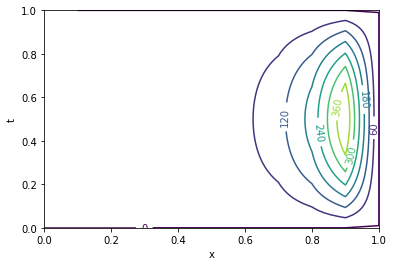

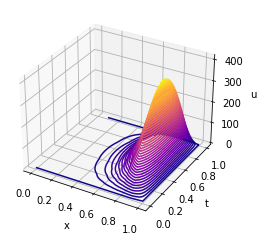

In [57]:
BTCS_ecology(c=1, d=15, L=1, T=1, dt=0.1, dx=0.01)